# Bank Loan Default  Prediction With Binomial Logistic Regression

## Introduction

Logistic regression is a technique for categorical prediction tasks. Binomial Logistic regression is a technique that models the probability of an  of observations falling into one of two categories based on one or more indepent variables. 

## Project Description

The goal of this project is to build a predictive model using binomial logistic regression to classify whether a bank loan will be Fully Paid or Charged Off. We will use various features from a bank loan dataset, such as the customer's loan status, loan amount, credit score, annual income, and other financial indicators. The primary focus is to predict the likelihood of a customer defaulting on a loan.

## Importing Libraries

In [1]:
# Import relevant packages

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
# Load the data into a DataFrame

data = pd.read_csv('credit_train.csv')

In [3]:
# Display the first 10 rows of the data

data.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


## Data Preprocessing

In [4]:
# select rows starting from index 100,000 onward
tail_nan = data.iloc[100000:]

# count the total number of missing values in the selected rows
tail_nan.isna().sum()

Loan ID                         514
Customer ID                     514
Loan Status                     514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    514
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

The last 514 rows contain missing values, so we have to drop them.

In [5]:
# Drop the last 514 rows from the data

data.drop(data.tail(514).index, inplace=True)

In [6]:
# Display summary of the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [7]:
# Display the count of unique entries in each column

data.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [8]:
# count the total number of missing values in each column

Total = data.isna().sum().sort_values(ascending=False)

#Calculate the percentage of missing values in each column

Percent = (data.isna().sum() / len(data)).sort_values(ascending=False)

missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Months since last delinquent,53141,0.53141
Credit Score,19154,0.19154
Annual Income,19154,0.19154
Years in current job,4222,0.04222
Bankruptcies,204,0.00204
Tax Liens,10,0.00010
Maximum Open Credit,2,0.00002
Years of Credit History,0,0.00000
Current Credit Balance,0,0.00000
Number of Credit Problems,0,0.00000


In [9]:
# Drop Month since last delinquent since it has 50% missing values, and drop loan ID and customer ID columns

data.drop(columns=['Months since last delinquent', 'Loan ID', 'Customer ID'],axis=1, inplace=True)

In [10]:
# filling missing values in credit score and annual income with mean

data['Credit Score'].fillna(data['Credit Score'].mean(), inplace=True)
data['Annual Income'].fillna(data['Annual Income'].mean(), inplace=True)

In [11]:
# fill missing values in Maximum Open Credit,Bankruptcies and Tax Liens with zero

data['Maximum Open Credit'].fillna(0, inplace = True)

data['Bankruptcies'].fillna(0, inplace = True)

data['Tax Liens'].fillna(0, inplace = True)

In [12]:
# Display unique values in Home ownership column

data['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [13]:
# Home Mortgage and HaveMortgage mean the same thing

data['Home Ownership'].replace('HaveMortgage', 'Home Mortgage', inplace=True)

In [14]:
# Display unique values in Purpose column

data['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'Other', 'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [15]:
# Replace values in the 'Purpose' column to consolidate categories

data['Purpose'] = data['Purpose'].replace({"other": "Other",
                                           "Home Improvements": "Personal",
                                           "Buy House": "Personal",
                                           "Business Loan": "Personal",
                                           "Buy a Car": "Personal",
                                          "major_purchase": "Personal",
                                          "Take a Trip": "Personal",
                                          "small_business": "Personal",
                                          "Medical Bills": "Personal",
                                          "wedding": "Personal",
                                          "vacation": "Personal",
                                          "Educational Expenses": "Personal",
                                          "moving": "Personal",
                                          "renewable_energy": "Personal"
                                          })

In [16]:
# Confirm changes

data['Purpose'].unique()

array(['Personal', 'Debt Consolidation', 'Other'], dtype=object)

In [17]:
# Number of loan applicant by Years in current Job 

data['Years in current job'].value_counts()

Years in current job
10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: count, dtype: int64

In [18]:
# fill missing values with the year with highest values +10 years 

data['Years in current job'].fillna('10+ years', inplace = True)

In [19]:
data.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [20]:
# Count the total number of duplicate rows

data.duplicated().sum()

10215

In [21]:
# Drop duplicate rows

data = data.drop_duplicates()

In [22]:
# confirm changes

data.duplicated().sum()

0

In [23]:
# Display the number of rows and columns

data.shape

(89785, 16)

#### Check class balance

Next, we have to check the class balance in the target variable, **Loan Status**. 

In [25]:
# Display percentage(%) of values for each class represented in the target column of the dataset.

data['Loan Status'].value_counts(normalize=True)*100

Loan Status
Fully Paid     74.78532
Charged Off    25.21468
Name: proportion, dtype: float64

The dataset is not perfectly balanced, with approximately 74.79% of loan being **fully paid** and  25.21% being **charged off**.
50-50 split is a rare occurance in datasets, and a 75 - 25 split is not too imbalanced. However, if the majority class made up 90% or more of the dataset, then that would be of concern, and it would be necessary to address that issue through techniques oversampling the minority and undersampling the majority class.

#### Encode categorical variables

In [26]:
# Convert 'Loan Status' column to binary values (0 and 1) 
data['Loan Status'] = data['Loan Status'].replace({'Fully Paid': 1, 'Charged Off': 0})

# Ensure the column is saved as integer type
data['Loan Status'] = data['Loan Status'].astype(int)

In [27]:
# Categorical predictor variable encoding

from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()

# Encoding 'Term'
data['Term'] = label_encoder.fit_transform(data['Term'])

# Encoding 'Years in current job'
data['Years in current job'] = label_encoder.fit_transform(data['Years in current job'])

# Encoding 'Home Ownership'
data['Home Ownership'] = label_encoder.fit_transform(data['Home Ownership'])

# Encoding 'Purpose'
data['Purpose'] = label_encoder.fit_transform(data['Purpose'])

####  Feature Scaling

In [28]:

# Standardizing the numeric features to have zero mean and 1 standard deviation 

scaling_columns = ['Current Loan Amount', 'Credit Score', 'Annual Income',  'Monthly Debt',
                   'Years of Credit History','Number of Open Accounts', 'Current Credit Balance',
                  'Maximum Open Credit']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[scaling_columns] = sc.fit_transform(data[scaling_columns])

In [29]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,-0.378896,1,-0.294370,-0.213187,8,0,2,-1.085379,-0.149070,-1.024884,1.0,-0.176896,-0.040768,1.0,0.0
1,1,-0.384395,1,-0.030694,0.001912,1,0,0,1.226744,0.405335,4.776443,0.0,-0.172098,0.008536,0.0,0.0
2,1,2.611147,1,-0.271408,0.873007,8,1,0,0.889537,-0.476027,1.375665,1.0,0.010641,-0.002902,0.0,0.0
3,1,-0.381832,0,-0.285759,-0.581114,3,1,0,-0.794964,-0.888277,-0.424747,0.0,-0.101299,-0.044151,0.0,0.0
4,1,-0.386981,1,-0.030694,0.001912,5,2,0,0.184665,-1.726992,0.775527,0.0,-0.109007,-0.039583,0.0,0.0


## Splitting data

We’ve prepared our data and we’re ready to model. There’s one last step before we can begin. We
must split the data into features and target variable, and into training data and test data. We do
this using the train_test_split() function. We’ll put 20% of the data into our test set, and use
the remaining 80% to train the model.

In [30]:
# Define the y variable

y = data['Loan Status']

# Define x variable

x = data.copy()
x = x.drop('Loan Status', axis=1)

# split into training and holdout datasets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state = 42)  

In [31]:
# Display the shape (rows, columns) of the output from the train-test split.

# Print the shape of x_train.

print(x_train.shape)
# Print the shape of x_test.

print(x_test.shape)
# Print the shape of y_train.

print(y_train.shape)
# Print the shape of y_test.

print(y_test.shape)


(71828, 15)
(17957, 15)
(71828,)
(17957,)


##  Model Building

In [32]:
#  Train logistic regression model

clf = LogisticRegression().fit(x_train,y_train)

In [33]:
# predict on test data

y_pred = clf.predict(x_test)

print(y_pred)

[1 1 0 ... 1 1 1]


In [34]:
# Use predict_proba to output a probability.

clf.predict_proba(x_test)

array([[3.35453128e-04, 9.99664547e-01],
       [1.97241147e-01, 8.02758853e-01],
       [9.98048224e-01, 1.95177618e-03],
       ...,
       [2.28189540e-01, 7.71810460e-01],
       [1.72287478e-01, 8.27712522e-01],
       [1.64485527e-04, 9.99835514e-01]])

## Model Evaluation

In [35]:
#  Evaluate model performance

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.800078
Precision: 0.789809
Recall: 0.998362
F1 Score: 0.881923


**Accuracy:** The model correctly predicts 80.01% of all loan outcomes, whether they are fully paid or charged off.

**Precision:** Out of all the loans predicted as "Fully Piad," 78.98% were actually Fully Paid. 

**Recall:** The model successfully identifies 99.84% of all loans that were actually charged off.

**F1 Score:**  F1 score of 88.19% indicates the model performs well in both precision and recall.

#### Confusion matrix 

The confusion matrix below illustrates how accurate the logistic regression model is at predicting loan outcomes.

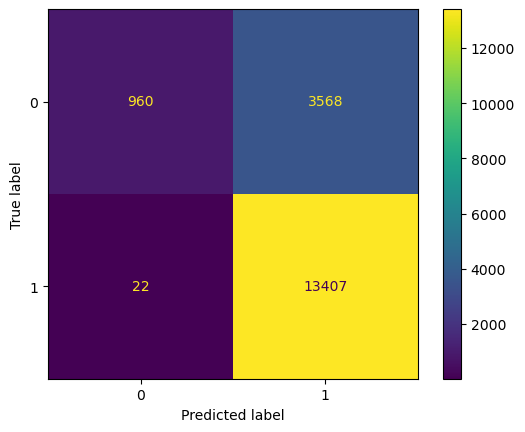

In [36]:
#  Plot confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

**True Negatives(960):** Loans that were correctly predicted as Charged Off loans.

**False Negative(22):** missed Charged Off loans(predicted as Fully Paid).

**False Positive(3568):** actually Fully paid loans(predicted as Charged Off).

**True Positive(13407):** Loans that were correctly predicted as Fully Paid loans.

#### ROC curve

Receiver Operating Characteristic(ROC) curve helps in visualizing the performance of the logistic regressiom classifier.it is a plot of the true positive rate against the false positive rate. 

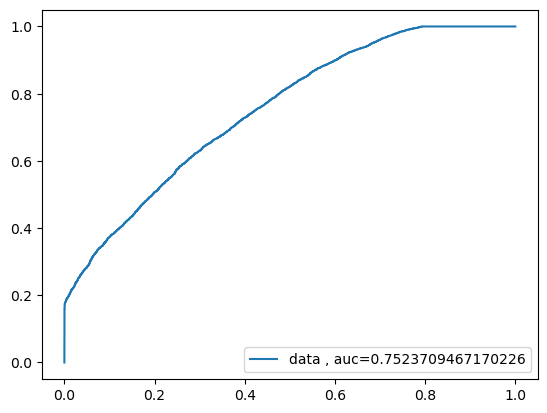

In [37]:
# Plot ROC curve

y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

##  Conclusion

The logistic regression model created demonstrates moderate effectiveness in predicting loan status, specifically identifying loans that are likely to be Fully Paid or Charged Off.
Notably, the model performed better at predicting true negatives (actual Charged Off loans)  with a recall rate of 99.84%, indicating its ability to accurately identify loans that would likely result in default.